*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur and updated by Ross Beveridge.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


<a href="https://colab.research.google.com/github//asabenhur/CS345/blob/master/fall24/notebooks/module01_04_hyperplanes.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

# Hyperplanes

Hyperplanes are a key mathematical object that is at the heart of many machine learning classification methods. Hyperplanes give rise to **linear classifiers**, which are one of the most important class of machine learning models.

To motivate this concept, consider the following toy classification problem in two dimensions:

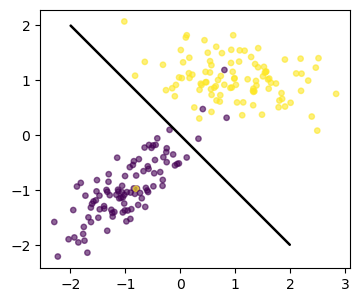

In [2]:
n_samples  = 200
n_features = 2
n_classes  = 2
n_clusters = 1
class_sep = 1.0
X,y = make_classification(n_samples=n_samples, 
                          n_features=n_features, 
                          n_classes=n_classes, 
                          n_clusters_per_class=n_clusters, 
                          class_sep=class_sep,
                          n_redundant=0, n_repeated=0, n_informative=2, 
                          random_state=16)

fig = plt.figure(figsize=(4,4))
ax  = fig.add_subplot(111, aspect='equal')
ax.scatter(X[:,0], X[:,1], c=y, alpha=0.6, s=15, cmap='viridis');
ax.arrow(2, -2,-4,4,
         width=0.02,head_width=0.0, length_includes_head=True, 
         alpha=1,linestyle='-',color='black');

The black line in the figure above  provides very good accuracy in distinguishing between the two classes. 

For three dimensional data, we could use a plane; but for higher dimensional data, we will need a generalization of the concept of a line or plane, namely a **hyperplane**.


**Definition.** A hyperplane is the set of vectors $\mathbf{x}$ is satisfy

$$
\mathbf{w}^\top \mathbf{x} + b = 0,
$$

where $\mathbf{w}$ is a fixed vector, called the **weight vector** and $b$ is a scalar value called the **bias**.

#### Example:  hyperplanes in two dimensions

In two dimensions a hyperplane has the form:

$$
w_1 x_1 + w_2 x_2 + b = 0
$$

This can be expressed as:

$$
x_2 = - \frac{w_1}{w_2} x_1 - \frac{b}{w_2},
$$

which is the familiar expression for a line.

### Hyperplanes without a bias

To understand hyperplanes better, we'll start with the case $b=0$.  Such a hyperplane is defined by the equation

$$
\mathbf{w}^\top \mathbf{x} = 0.
$$

One thing we can immediately notice is that the origin is a solution to this equation regardless of the value of $\mathbf{w}$.  This tells us that a hyperplane with $b=0$ passes through the origin.  The following plot demonstrates that:

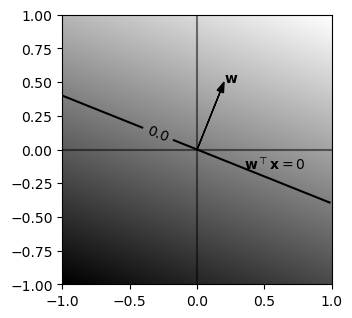

In [3]:
w = np.array([0.2, 0.5])

# setting up the grid
delta = 0.01
xmin=-1;xmax=1;ymin=-1;ymax=1
xs = np.arange(xmin, xmax, delta)
ys = np.arange(ymin, ymax, delta)
x_grid, y_grid = np.meshgrid(xs, ys)

# the value produced by the hyperplane at each point of the grid
Z = w[0] * x_grid + w[1] * y_grid

plt.figure(figsize=(3.5,3.5))

im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=plt.cm.gray, extent=(xmin,xmax,ymin,ymax) )

C = plt.contour(x_grid, y_grid, Z, 1, origin='lower',
                colors = 'black')

plt.axhline(y=0, xmin = -1, xmax=1, color='black', alpha=0.5)
plt.axvline(x=0, ymin = -1, ymax=1, color='black', alpha=0.5)

plt.clabel(C, inline=1, fmt='%1.1f')
plt.arrow(0,0,w[0],w[1], width=0.001,head_width=0.05, length_includes_head=True, 
          alpha=1,linestyle='-',color='k');
plt.text(w[0], w[1], r"$\mathbf{w}$");
plt.text(0.35, -0.15, r"$\mathbf{w}^\top \mathbf{x} = 0$");


As we have seen previously, the dot product between two vectors is given by

$$
\mathbf{w}^\top \mathbf{x} = ||\mathbf{w}|| \; ||\mathbf{x}|| \cos(\theta),
$$

where $\theta$ is the angle between the two vectors.
This implies that a hyperplane defined by the equation $\mathbf{w}^\top \mathbf{x}=0$ is *the set of all vectors* $\mathbf{x}$ *that are orthogonal to* $\mathbf{w}$.

We demonstrate this using the figure below, where the line is the hyperplane defined by $\mathbf{w}$.

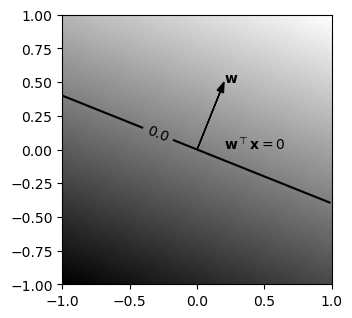

In [4]:
w = np.array([0.2, 0.5])

# setting up the grid
delta = 0.01
xmin=-1;xmax=1;ymin=-1;ymax=1
xs = np.arange(xmin, xmax, delta)
ys = np.arange(ymin, ymax, delta)
x_grid, y_grid = np.meshgrid(xs, ys)

# the value produced by the hyperplane at each point of the grid
Z = w[0] * x_grid + w[1] * y_grid

plt.figure(figsize=(3.5,3.5))

im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=plt.cm.gray, extent=(xmin,xmax,ymin,ymax) )

C = plt.contour(x_grid, y_grid, Z, 1, origin='lower',
                colors = 'black')

#plt.axhline(y=0, xmin = -1, xmax=1, color='black', alpha=0.5)
#plt.axvline(x=0, ymin = -1, ymax=1, color='black', alpha=0.5)

plt.clabel(C, inline=1, fmt='%1.1f')
plt.arrow(0,0,w[0],w[1], width=0.001,head_width=0.05, length_includes_head=True, alpha=1,linestyle='-',color='k');
plt.text(w[0], w[1], r"$\mathbf{w}$");
plt.text(0.2, 0, r"$\mathbf{w}^\top \mathbf{x} = 0$");

In the example above play with different choices for the vector $\mathbf{w}$.

### Hyperplanes for data classification

Not only does the hyperplane divide the space into two, the sign of the dot product $\mathbf{w}^\top \mathbf{x}$ can tell us what side of the hyperplane a point $\mathbf{x}$ is at:

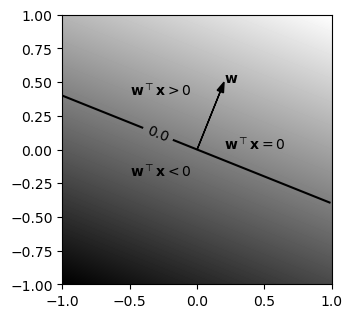

In [5]:
w = np.array([0.2, 0.5])

# setting up the grid
delta = 0.01
xmin=-1;xmax=1;ymin=-1;ymax=1
xs = np.arange(xmin, xmax, delta)
ys = np.arange(ymin, ymax, delta)
x_grid, y_grid = np.meshgrid(xs, ys)

# the value produced by the hyperplane at each point of the grid
Z = w[0] * x_grid + w[1] * y_grid

plt.figure(figsize=(3.5,3.5))

im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=plt.cm.gray, extent=(xmin,xmax,ymin,ymax) )

C = plt.contour(x_grid, y_grid, Z, 1, origin='lower',
                colors = 'black')

#plt.axhline(y=0, xmin = -1, xmax=1, color='black', alpha=0.5)
#plt.axvline(x=0, ymin = -1, ymax=1, color='black', alpha=0.5)

plt.clabel(C, inline=1, fmt='%1.1f')
plt.arrow(0,0,w[0],w[1], width=0.001,head_width=0.05, length_includes_head=True, alpha=1,linestyle='-',color='k');
plt.text(w[0], w[1], r"$\mathbf{w}$");
plt.text(0.2, 0, r"$\mathbf{w}^\top \mathbf{x} = 0$");
plt.text(-0.5, (0.1-w[0]*(-0.5))/w[1], r"$\mathbf{w}^\top\mathbf{x} > 0$");
plt.text(-0.5, (-0.2-w[0]*(-0.5))/w[1], r"$\mathbf{w}^\top\mathbf{x} < 0$");             

### A hyperplane as the decision boundary for a classifier

A hyperplane can be used as the decision boundary for a binary classifier.  Such a classifier needs to discriminate between two classes that we refer to as the positive and negative examples.
Using a hyperplane, we classify a vector $\mathbf{x}$ as a positive example if $\mathbf{w}^\top \mathbf{x} > 0$ , and as a negative example otherwise.

### Measuring distance from the hyperplane

Turns out that $\mathbf{w}^\top \mathbf{x}$ not only defines the hyperplane, but can also provide a measure of distance from the hyperplane (think why that might be useful in the machine learning context).

For that, let's consider the function:

$$
f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}
$$

and see how it varies for different points $\mathbf{x}$ in the plane. 

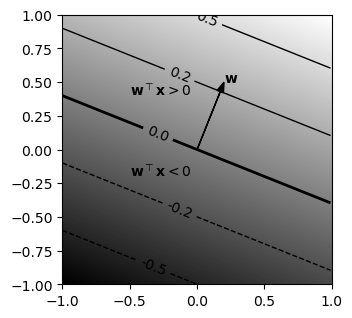

In [6]:
w = np.array([0.2, 0.5])

# setting up the grid
delta = 0.01
xmin=-1;xmax=1;ymin=-1;ymax=1
xs = np.arange(xmin, xmax, delta)
ys = np.arange(ymin, ymax, delta)
x_grid, y_grid = np.meshgrid(xs, ys)

Z = w[0] * x_grid + w[1] * y_grid

plt.figure(figsize=(3.5,3.5))
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=plt.cm.gray, extent=(xmin,xmax,ymin,ymax) )

C = plt.contour(x_grid, y_grid, Z, 5, 
                origin='lower',
                linewidths=(1,1,1,2,1,1,1),
                colors = 'black')

plt.clabel(C, inline=1, fmt='%1.1f')
 
plt.arrow(0,0,w[0],w[1], width=0.001,head_width=0.05, length_includes_head=True, alpha=1,linestyle='-',color='k');
plt.text(w[0], w[1], r"$\mathbf{w}$");
plt.text(-0.5, (0.1-w[0]*(-0.5))/w[1], r"$\mathbf{w}^\top\mathbf{x} > 0$");
plt.text(-0.5, (-0.2-w[0]*(-0.5))/w[1], r"$\mathbf{w}^\top\mathbf{x} < 0$");                

In the figure above you see the value of $\mathbf{w}^\top \mathbf{x}$ increases as you move away from the line $\mathbf{w}^\top \mathbf{x} = 0$. To be more precise, the values becomes more positive as the projection of the vector on the weight vector representing the hyperplane increases, and more negative on the other side of the hyperplane.

To see that, consider a weight vector with unit length $\hat{\mathbf{w}}$.  
For this choice,
$
f(\mathbf{x}) = \hat{\mathbf{w}}^\top \mathbf{x}
$,
which, as we discussed earlier, is the size of the projection of $\mathbf{x}$ in the direction $\hat{\mathbf{w}}$.


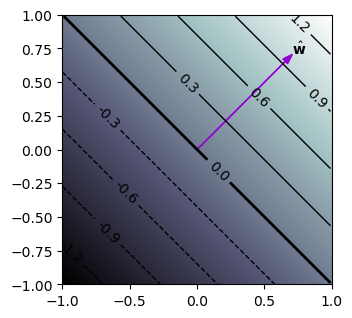

In [7]:
w = np.array([1.0,1.0])
w = w / np.linalg.norm(w)

# setting up the grid
delta = 0.01
xmin=-1;xmax=1;ymin=-1;ymax=1
xs = np.arange(xmin, xmax, delta)
ys = np.arange(ymin, ymax, delta)
x_grid, y_grid = np.meshgrid(xs, ys)

Z = w[0] * x_grid + w[1] * y_grid

plt.figure(figsize=(3.5,3.5))
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=plt.cm.bone, extent=(xmin,xmax,ymin,ymax) )

C = plt.contour(x_grid, y_grid, Z, 9, 
                origin='lower',
                linewidths=(1,1,1,1,1,2,1,1,1,1),
                colors = 'black')

plt.clabel(C, inline=1, fmt='%1.1f')
 
plt.arrow(0,0,w[0],w[1], width=0.001,head_width=0.05, length_includes_head=True, 
          alpha=1,linestyle='-',color='darkviolet');
plt.text(w[0], w[1], r"$\hat{\mathbf{w}}$");



### Question

* What can you say about the angle between $\mathbf{w}$ and $\mathbf{x}$ when $\mathbf{w}^\top \mathbf{x} > 0$?  When $\mathbf{w}^\top \mathbf{x} < 0$?

### Demonstrating the effect of the length of $\mathbf{w}$

Using the next figure play with different choices of the length of the weight vector and determine the effect on the hyperplane and the signed distance $f(\mathbf{x})$.

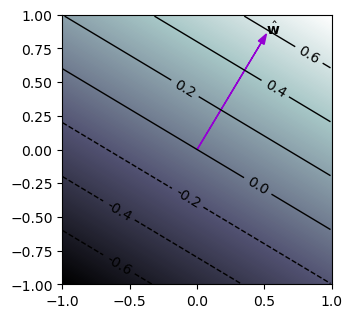

In [8]:
# play with the following parameter and determine the effect on f(x)
multiplier = 1

w = multiplier*np.array([0.3,0.5])
w_normalized = w / np.linalg.norm(w)

# setting up the grid
delta = 0.01
xmin=-1;xmax=1;ymin=-1;ymax=1
xs = np.arange(xmin, xmax, delta)
ys = np.arange(ymin, ymax, delta)
x_grid, y_grid = np.meshgrid(xs, ys)

Z = w[0] * x_grid + w[1] * y_grid

plt.figure(figsize=(3.5,3.5))
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=plt.cm.bone, extent=(xmin,xmax,ymin,ymax) )

C = plt.contour(x_grid, y_grid, Z, 9, 
                origin='lower',
                linewidths=(1,1,1,1,1,1,1,1,1,1),
                colors = 'black')

plt.clabel(C, inline=1, fmt='%1.1f')
 
plt.arrow(0,0,w_normalized[0],w_normalized[1], 
          width=0.001,head_width=0.05, length_includes_head=True, 
          alpha=1,linestyle='-',color='darkviolet');
plt.text(w_normalized[0], w_normalized[1], r"$\hat{\mathbf{w}}$");

### Exercise

* In this exercise we will focus on hyperplanes with $b=0$.  Let $\mathbf{w}$ and $\mathbf{w}'$ be weight vectors such that
$\mathbf{w}' = a \mathbf{w}$, where $a$ is a positive number.
What can you say about the relationship between the resulting hyperplanes?


### Hyperplane with a nonzero bias

Hyperplanes with a nonzero bias ($b \neq 0$) behave similarly to the zero bias case, except that the hyperplane no longer passes through the origin as demonstrated in the next figure:

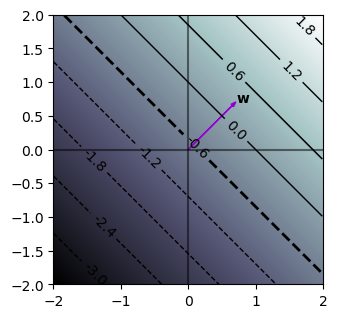

In [9]:
w = np.array([0.5,0.5])
w = w / np.linalg.norm(w)

# introduce a bias
#b = 0.2
b = -1/np.sqrt(2)

delta = 0.01
xmin=-2;xmax=2;ymin=-2;ymax=2
xs = np.arange(xmin, xmax, delta)
ys = np.arange(ymin, ymax, delta)
x_grid, y_grid = np.meshgrid(xs, ys)

Z = w[0] * x_grid + w[1] * y_grid + b

plt.figure(figsize=(3.5,3.5))
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=plt.cm.bone, extent=(xmin,xmax,ymin,ymax) )

C = plt.contour(x_grid, y_grid, Z, 9, 
                origin='lower',
                linewidths=(1,1,1,1,1,2,1,1.1,1,1),
                colors = 'black')

plt.clabel(C, inline=1, fmt='%1.1f')
plt.axhline(y=0, xmin = -1, xmax=1, color='black', alpha=0.5)
plt.axvline(x=0, ymin = -1, ymax=1, color='black', alpha=0.5)
 
plt.arrow(0,0,w[0],w[1], width=0.001,head_width=0.05, length_includes_head=True, 
          alpha=1,linestyle='-',color='darkviolet');
plt.text(w[0], w[1], r"$\mathbf{w}$");

### Hyperplanes in higher dimensions

The story in higher dimensions is the same as in two dimensions.  In the general case of vectors in $d$ dimensions, the hyperplane has $d-1$ dimensions
and divides the space into two half-spaces - exactly what we need for a binary classifier!
Hyperplanes create a **linear decision boundary**.
We can visualize this in three dimensions, where the decision boundary is a plane:

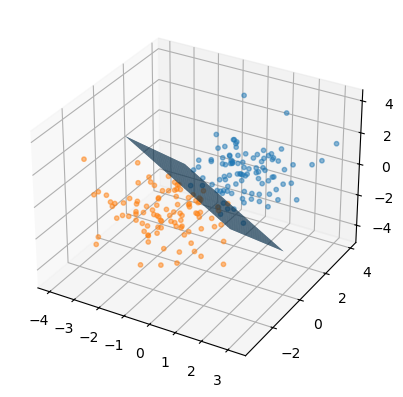

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC

# in order to use matplotlib interactively using "widget" mode you will need
# to install ipympl e.g. using conda install ipympl
    
#%matplotlib widget
#%matplotlib inline 

# example based on code from 
# https://stackoverflow.com/questions/36232334/plotting-3d-decision-boundary-from-linear-svm


rng = np.random.default_rng(42)
n_samples = 200
# generate some toy data in 3 dimensions
# X is the feature matrix
X = np.zeros((200,3))
X[:n_samples//2] = rng.multivariate_normal( np.ones(3)*1, np.eye(3), size=n_samples//2)
X[n_samples//2:] = rng.multivariate_normal(-np.ones(3)*1, np.eye(3), size=n_samples//2)
# Y is the class labels for each row of X.
Y = np.zeros(n_samples)
Y[n_samples//2:] = 1

# Fit the data with an svm
svc = SVC(kernel='linear')
svc.fit(X,Y)

# The equation of the separating plane is given by all x in R^3 such that:
# np.dot(svc.coef_[0], x) + b = 0. We should solve for the last coordinate
# to plot the plane in terms of x and y.

z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]*y) / svc.coef_[0][2]

tmp = np.linspace(-2,2,50)
x,y = np.meshgrid(tmp,tmp)

# plot the data and hyperplane
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z(x,y))
ax.scatter(X[Y==0,0], X[Y==0,1], X[Y==0,2], alpha=0.5, s=10)
ax.scatter(X[Y==1,0], X[Y==1,1], X[Y==1,2], alpha=0.5, s=10);

#ax.view_init(0, 180);

### Hyperplanes for classification in two dimensions

Consider now a binary classification problem in two dimensions:

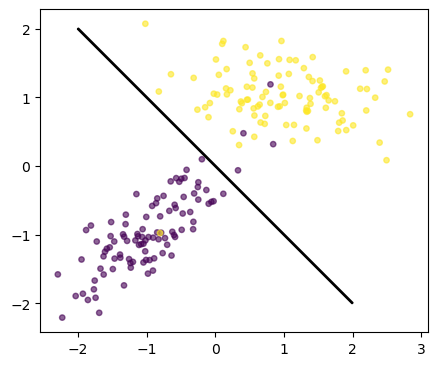

In [11]:
%matplotlib inline
n_samples  = 200
n_features = 2
n_classes  = 2
n_clusters = 1
class_sep = 1.0
X,y = make_classification(n_samples=n_samples, 
                          n_features=n_features, 
                          n_classes=n_classes, 
                          n_clusters_per_class=n_clusters, 
                          class_sep=class_sep,
                          n_redundant=0, n_repeated=0, n_informative=2, 
                          random_state=16)

fig = plt.figure(figsize=(5,5))
ax  = fig.add_subplot(111, aspect='equal')
ax.scatter(X[:,0], X[:,1], c=y, alpha=0.6, s=15, cmap='viridis');
ax.arrow(2, -2,-4,4,
         width=0.02,head_width=0.0, length_includes_head=True, 
         alpha=1,linestyle='-',color='black');

Given our discussion of hyperplanes, it should now be clear how they can be used as the basis for machine learning algorithms.

## Summary

Hyperplanes are high-dimensional generalizations of lines and planes.  They can be used to define linear decision boundaries and are the basis for many of the most useful techniques for data classification tasks.

### Coming next: how to learn a hyperplane

In machine learning there is a rich history regarding ways to pick a "good"  hyperplane.  During this course we will study several ways of doing so, based on different ideas of what a good hyperplane looks like.
This includes:
* The perceptron algorithm
* Support vector machines
* Logistic regression

Although using a hyperplane might seem restrictive, and too simple of a model, as we will see in the coming weeks, a hyperplane is often all you need for high dimensional data.
